In [1]:
from attr_utils import AttributeDict
import json
import argparse
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\vince\anaconda3\envs\anomaly\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
fileNameNN = 'data_save/LHCO2020_cb-VAE_events_6var_NoF_SR_2.csv'
generated_signal = pd.read_csv(fileNameNN, delimiter = ' ', header=None, index_col=False)
generated_signal = generated_signal.to_numpy()
monte_carlo_signal = np.load("Datasets/preprocessed_data_6var/innerdata_train_6var.npy")
mjj_generated_signal = np.load("data_save/mjj_SR_values.npy")

In [11]:
print(monte_carlo_signal.shape)

print(generated_sorted_signal.shape)
print(mjj_generated_signal.max())
print(mjj_generated_signal.min())

(60000, 8)
(60000, 7)
3.699972154299443
3.3000175074648905


In [4]:

combined_signal = np.zeros((60000,7))
mjj_generated_signal = mjj_generated_signal.reshape(400000)
combined_signal[:,0] = mjj_generated_signal[0:60000]
combined_signal[:,1:7] = generated_signal[0:60000]
monte_carlo_sorted_signal = monte_carlo_signal[monte_carlo_signal[:, 0].argsort()]
generated_sorted_signal = combined_signal[combined_signal[:, 0].argsort()]


In [6]:
combined_sideband = np.zeros((878648,7))
mjj_generated_sideband = mjj_generated_sideband.reshape(878648)
combined_sideband[:,0] = mjj_generated_sideband[0:878648]
combined_sideband[:,1:7] = generated_sideband[0:878648]
monte_carlo_sorted_sideband = monte_carlo_sideband[monte_carlo_sideband[:, 0].argsort()]
generated_sorted_sideband = combined_sideband[combined_sideband[:, 0].argsort()]


NameError: name 'mjj_generated_sideband' is not defined

In [10]:
print(mjj_generated_signal.min())
print(mjj_generated_signal.max())
print(monte_carlo_signal[:,0].min())
print(monte_carlo_signal[:,0].max())


3.3000175074648905
3.699972154299443
3.3000058388954225
3.6999854616441583


[3.30000584 3.30001769 3.300023   ... 3.69996838 3.69997206 3.69998546]


(array([7647., 7118., 6944., 6380., 6241., 5654., 5486., 5200., 4798.,
        4532.]),
 array([3.30000584, 3.3400038 , 3.38000176, 3.41999973, 3.45999769,
        3.49999565, 3.53999361, 3.57999157, 3.61998954, 3.6599875 ,
        3.69998546]),
 <BarContainer object of 10 artists>)

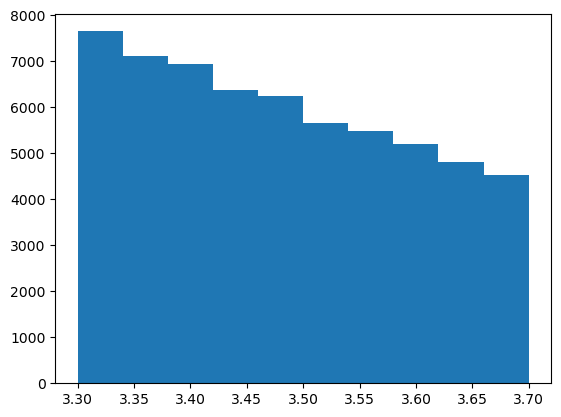

In [43]:
print(monte_carlo_sorted_signal[:,0])
plt.hist(monte_carlo_sorted_signal[:,0])
print(np.logical_and(monte_carlo_sorted_signal[:,0] >=))

In [23]:
slice1 = generated_sorted_signal[generated_sorted_signal[:,0] < 3.35]
print(slice1.shape)
print(slice1.max())

(9522, 7)
3.3499975325465057


In [41]:
sliceNum=8
feature=0
print(monte_carlo_sorted_signal[np.logical_and(monte_carlo_sorted_signal[:,0]>=3.3+0.05*(sliceNum), monte_carlo_sorted_signal[:,0]<3.3+0.5*(sliceNum+1))][feature].shape)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [59]:
print(generated_sorted)

NameError: name 'generated_sorted' is not defined

In [61]:
fig, axs = plt.subplots(7, 8, figsize=(100, 100))
for feature in range(7):
    for sliceNum in range(8):
        generated_slice = generated_sorted_signal[(generated_sorted_signal[:,0] >=3.3+0.05*(sliceNum)) & (generated_sorted_signal[:,0]<3.3+0.05*(sliceNum+1))][:,feature]
        monte_carlo_slice = monte_carlo_sorted_signal[(monte_carlo_sorted_signal[:,0]>=3.3+0.05*(sliceNum)) & (monte_carlo_sorted_signal[:,0]<3.3+0.05*(sliceNum+1))][:,feature]
        axs[feature,sliceNum].hist(generated_slice, label = "generated", histtype="step", density = True, bins=100)
        axs[feature,sliceNum].hist(monte_carlo_slice, label = "monte carlo", histtype = "step", density = True, bins=100)
        axs[feature,sliceNum].set_title("Slice " + str(sliceNum+1) + ", feature " + str(feature+1))

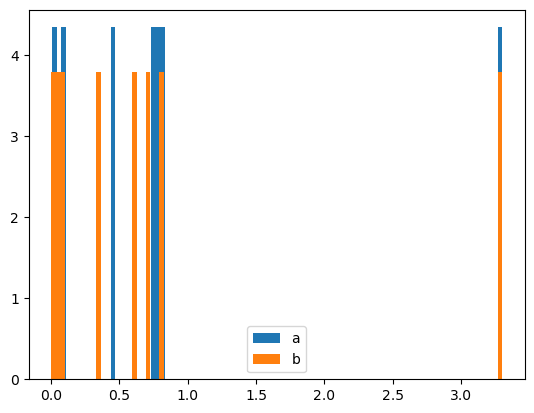

In [58]:
plt.hist(generated_sorted_signal[np.logical_and(generated_sorted_signal[:,0] > 3.3, generated_sorted_signal[:,0] < 3.35)][0], label="a", bins=100, density=True)
plt.hist(monte_carlo_sorted_signal[np.logical_and(monte_carlo_sorted_signal[:,0] > 3.3, monte_carlo_sorted_signal[:,0]<3.35)][0], label="b", bins=100, density=True)
plt.legend()
plt.show()

In [55]:
print(monte_carlo_sorted_signal[np.logical_and(monte_carlo_sorted_signal[:,0] > 3.3, monte_carlo_sorted_signal[:,0]<3.35)])

[[3.30000584 0.0605614  0.0735616  ... 0.35634914 0.81972392 0.        ]
 [3.30001769 0.0359047  0.1300653  ... 0.83694134 0.85530927 0.        ]
 [3.300023   0.0930639  0.25590509 ... 0.56990792 0.76898239 0.        ]
 ...
 [3.34998285 0.0803554  0.26851359 ... 0.8771322  0.50343967 0.        ]
 [3.34999707 0.121653   0.083323   ... 0.59360776 0.77418831 0.        ]
 [3.3499987  0.0969346  0.1490594  ... 0.91316371 0.63883171 0.        ]]


# Sideband vs Signal

In [1]:
from attr_utils import AttributeDict
import json
import argparse
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\vince\anaconda3\envs\anomaly\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
#loading signal

fileNameNN = 'data_save/LHCO2020_cb-VAE_events_6var_NoF_SR_2.csv'
generated_signal = pd.read_csv(fileNameNN, delimiter = ' ', header=None, index_col=False)
generated_signal = generated_signal.to_numpy()
monte_carlo_signal = np.load("Datasets/preprocessed_data_6var/innerdata_train_6var.npy")
mjj_generated_signal = np.load("data_save/mjj_SR_values.npy")


(60000, 8)


In [3]:
combined_signal = np.zeros((60000,7))
mjj_generated_signal = mjj_generated_signal.reshape(400000)
combined_signal[:,0] = mjj_generated_signal[0:60000]
combined_signal[:,1:7] = generated_signal[0:60000]
monte_carlo_sorted_signal = monte_carlo_signal[monte_carlo_signal[:, 0].argsort()]
generated_sorted_signal = combined_signal[combined_signal[:, 0].argsort()]


In [4]:
fileNameNN = 'data_save/LHCO2020_cb-VAE_events_6var_NoF_SB.csv'
generated_sideband = pd.read_csv(fileNameNN, delimiter = ' ', header=None, index_col=False)
generated_sideband = generated_sideband.to_numpy()
monte_carlo_sideband = np.load("Datasets/preprocessed_data_6var/outerdata_train_6var.npy")
test_values_sideband = np.load("Datasets/preprocessed_data_6var/outerdata_test_6var.npy")

monte_carlo_sideband = monte_carlo_sideband[monte_carlo_sideband[:, 7]==0]
test_values_sideband = test_values_sideband[test_values_sideband[:,7]==0]

mjj_generated_sideband = np.concatenate((monte_carlo_sideband[:,0], test_values_sideband[:,0]), axis=0)

In [5]:
print(monte_carlo_sideband.shape)

(499889, 8)


In [28]:
def fake_vs_real(gen_data,real_data,doLog,names):

    
    fig, axs = plt.subplots(3, 2, figsize=(30, 30))
    for feature in range(6):
        
        axs[int(feature/2),feature%2].hist(gen_data[:,feature], label = "generated", color="steelblue", histtype="stepfilled", density = True, bins=100)
        axs[int(feature/2),feature%2].hist(real_data[:,feature], label = "real", color="black", linewidth=2, histtype = "step", density = True, bins=100)
        axs[int(feature/2),feature%2].set_title("feature " + str(feature+1))
    
    

#        for rd in real_data: b_hist_y, b_hist_x, _ = plt.hist(rd[:,p], R, color="black", histtype='step', linewidth=2, label="Real B",density=True)        
 #       for i,n in enumerate(gen_data): plt.hist(n[:,p], R, color=colors[i], histtype='stepfilled', alpha=0.5, linewidth=2, label="Generated B %s"%names[i],density=True)


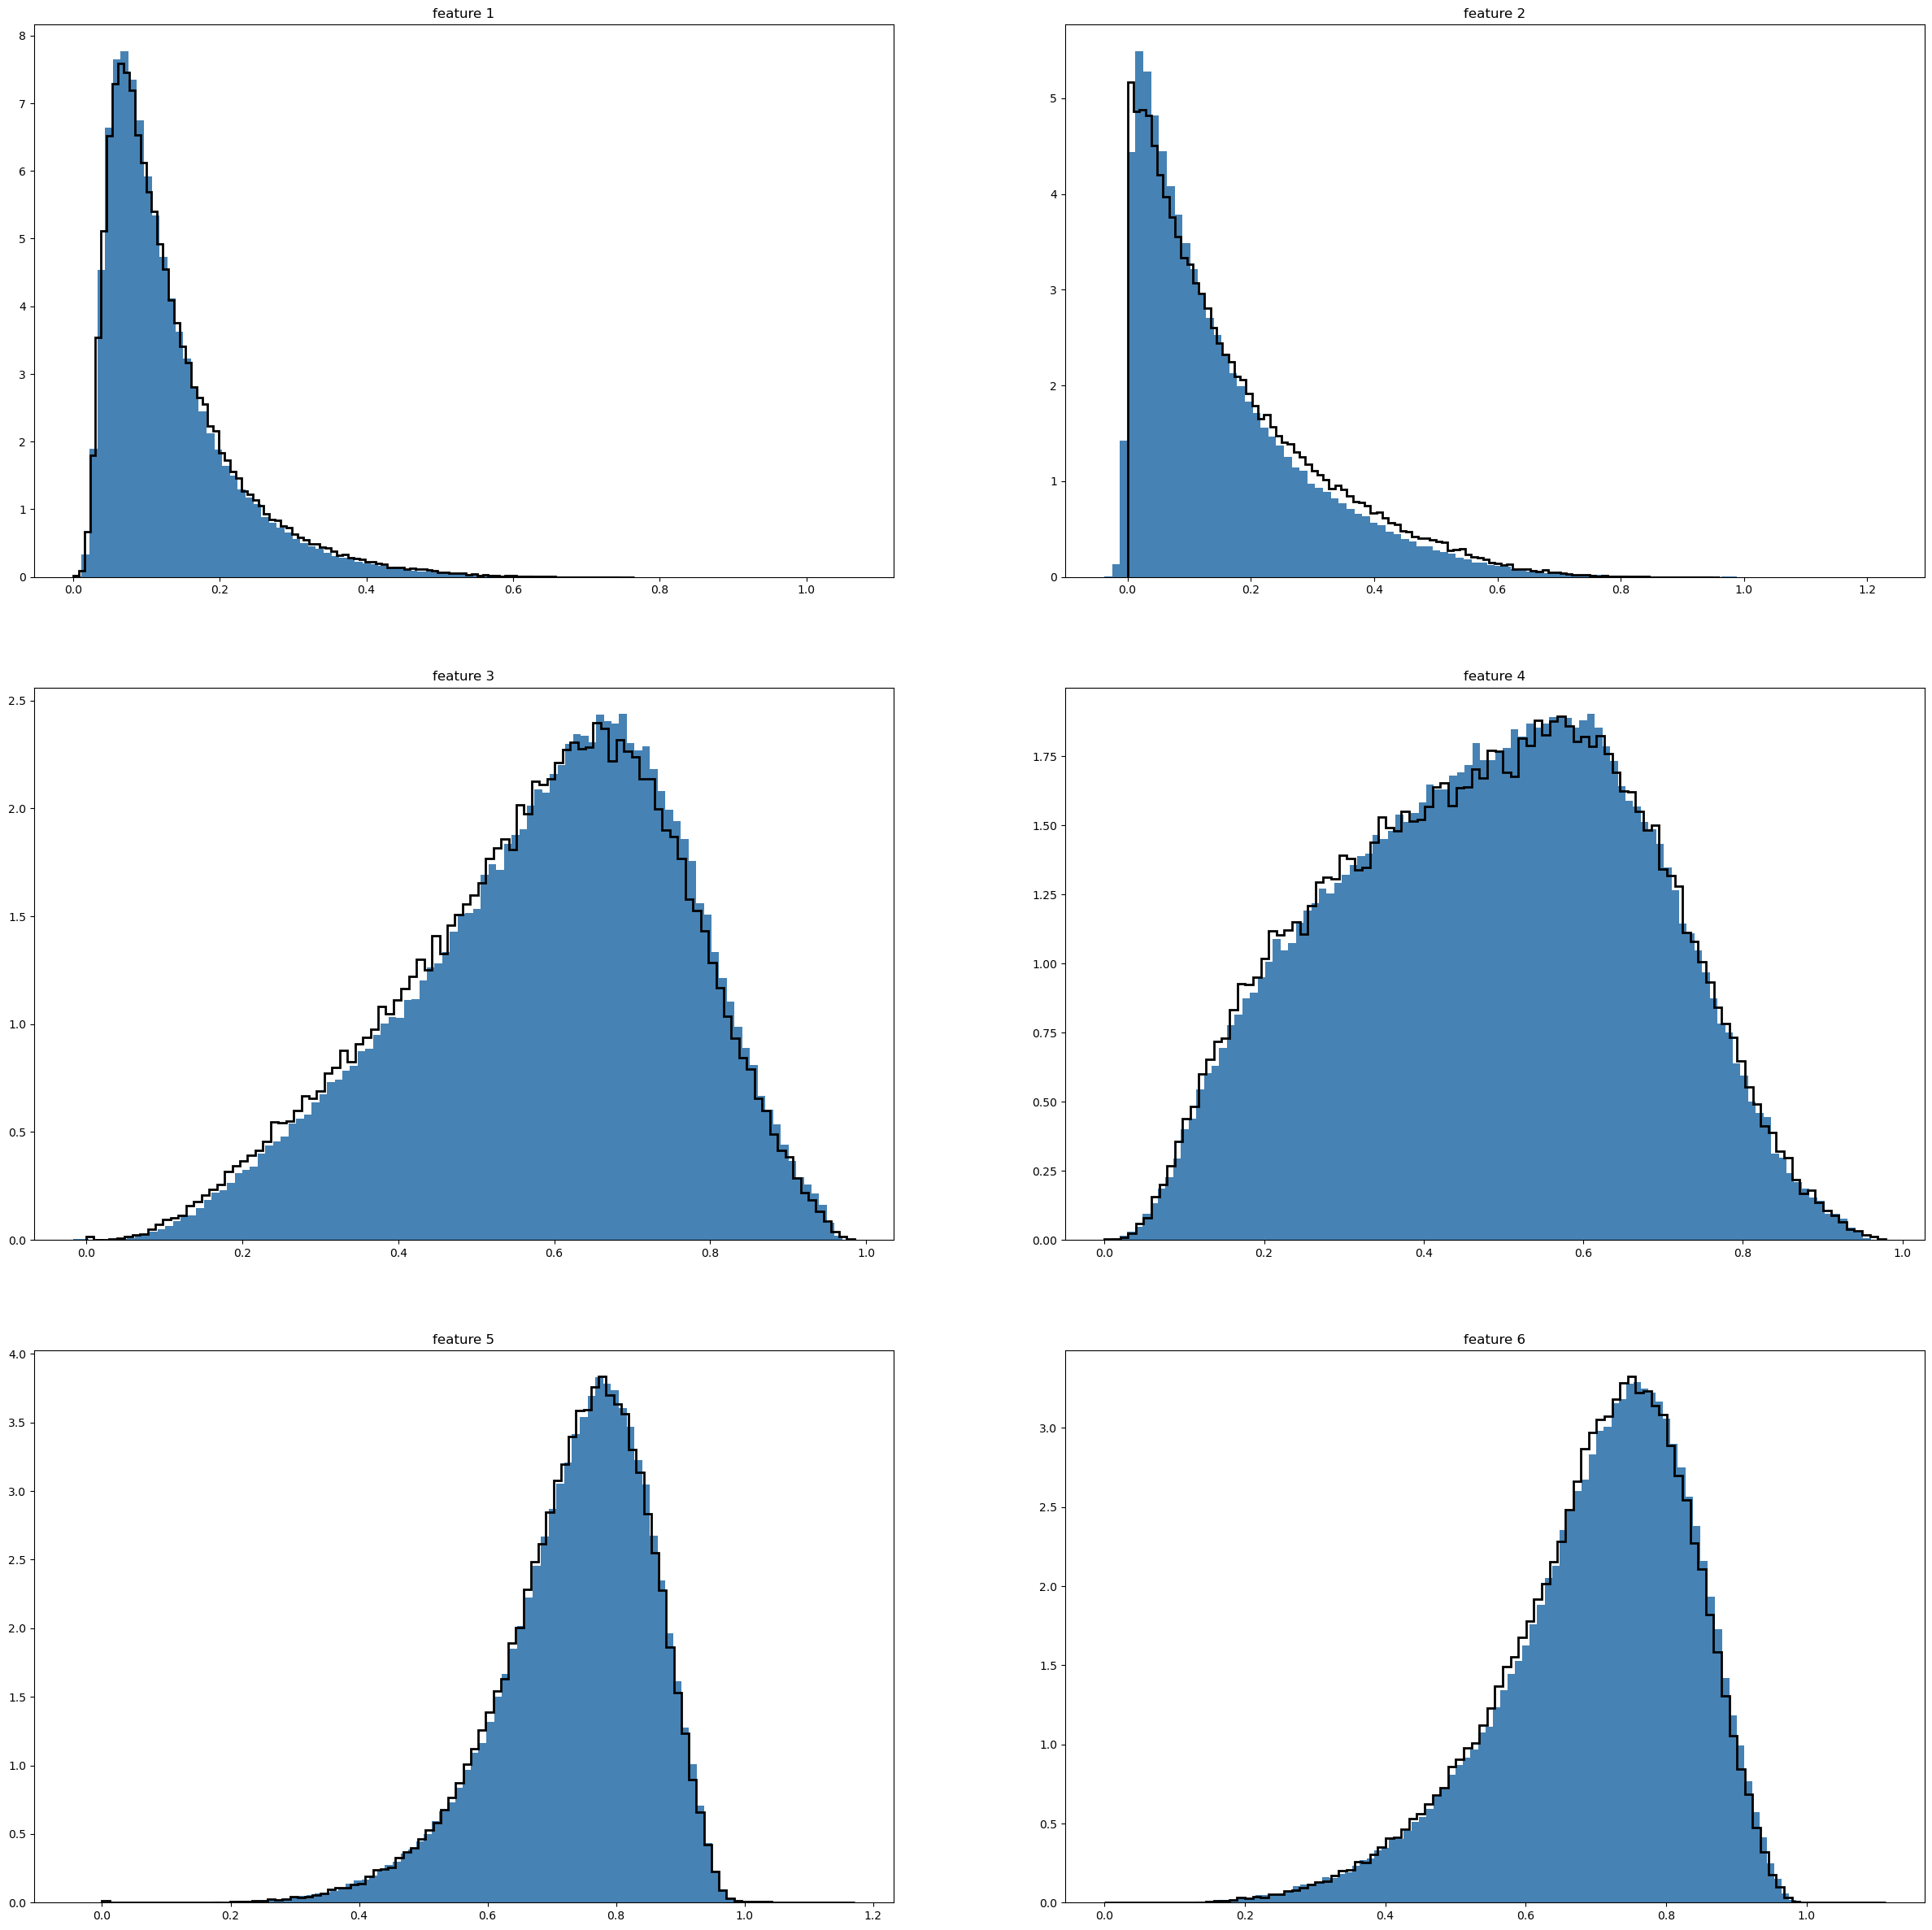

In [29]:
##plot lower sideband (2.9 to 3.3)

generated_sideband1 = generated_sideband[(mjj_generated_sideband>2.9) & (mjj_generated_sideband<3.3)]
monte_carlo_sideband1 = monte_carlo_sideband[(monte_carlo_sideband[:,0]>2.9) & (monte_carlo_sideband[:,0]<3.3),1:7]

fake_vs_real(generated_sideband1, monte_carlo_sideband1, 0, "test")

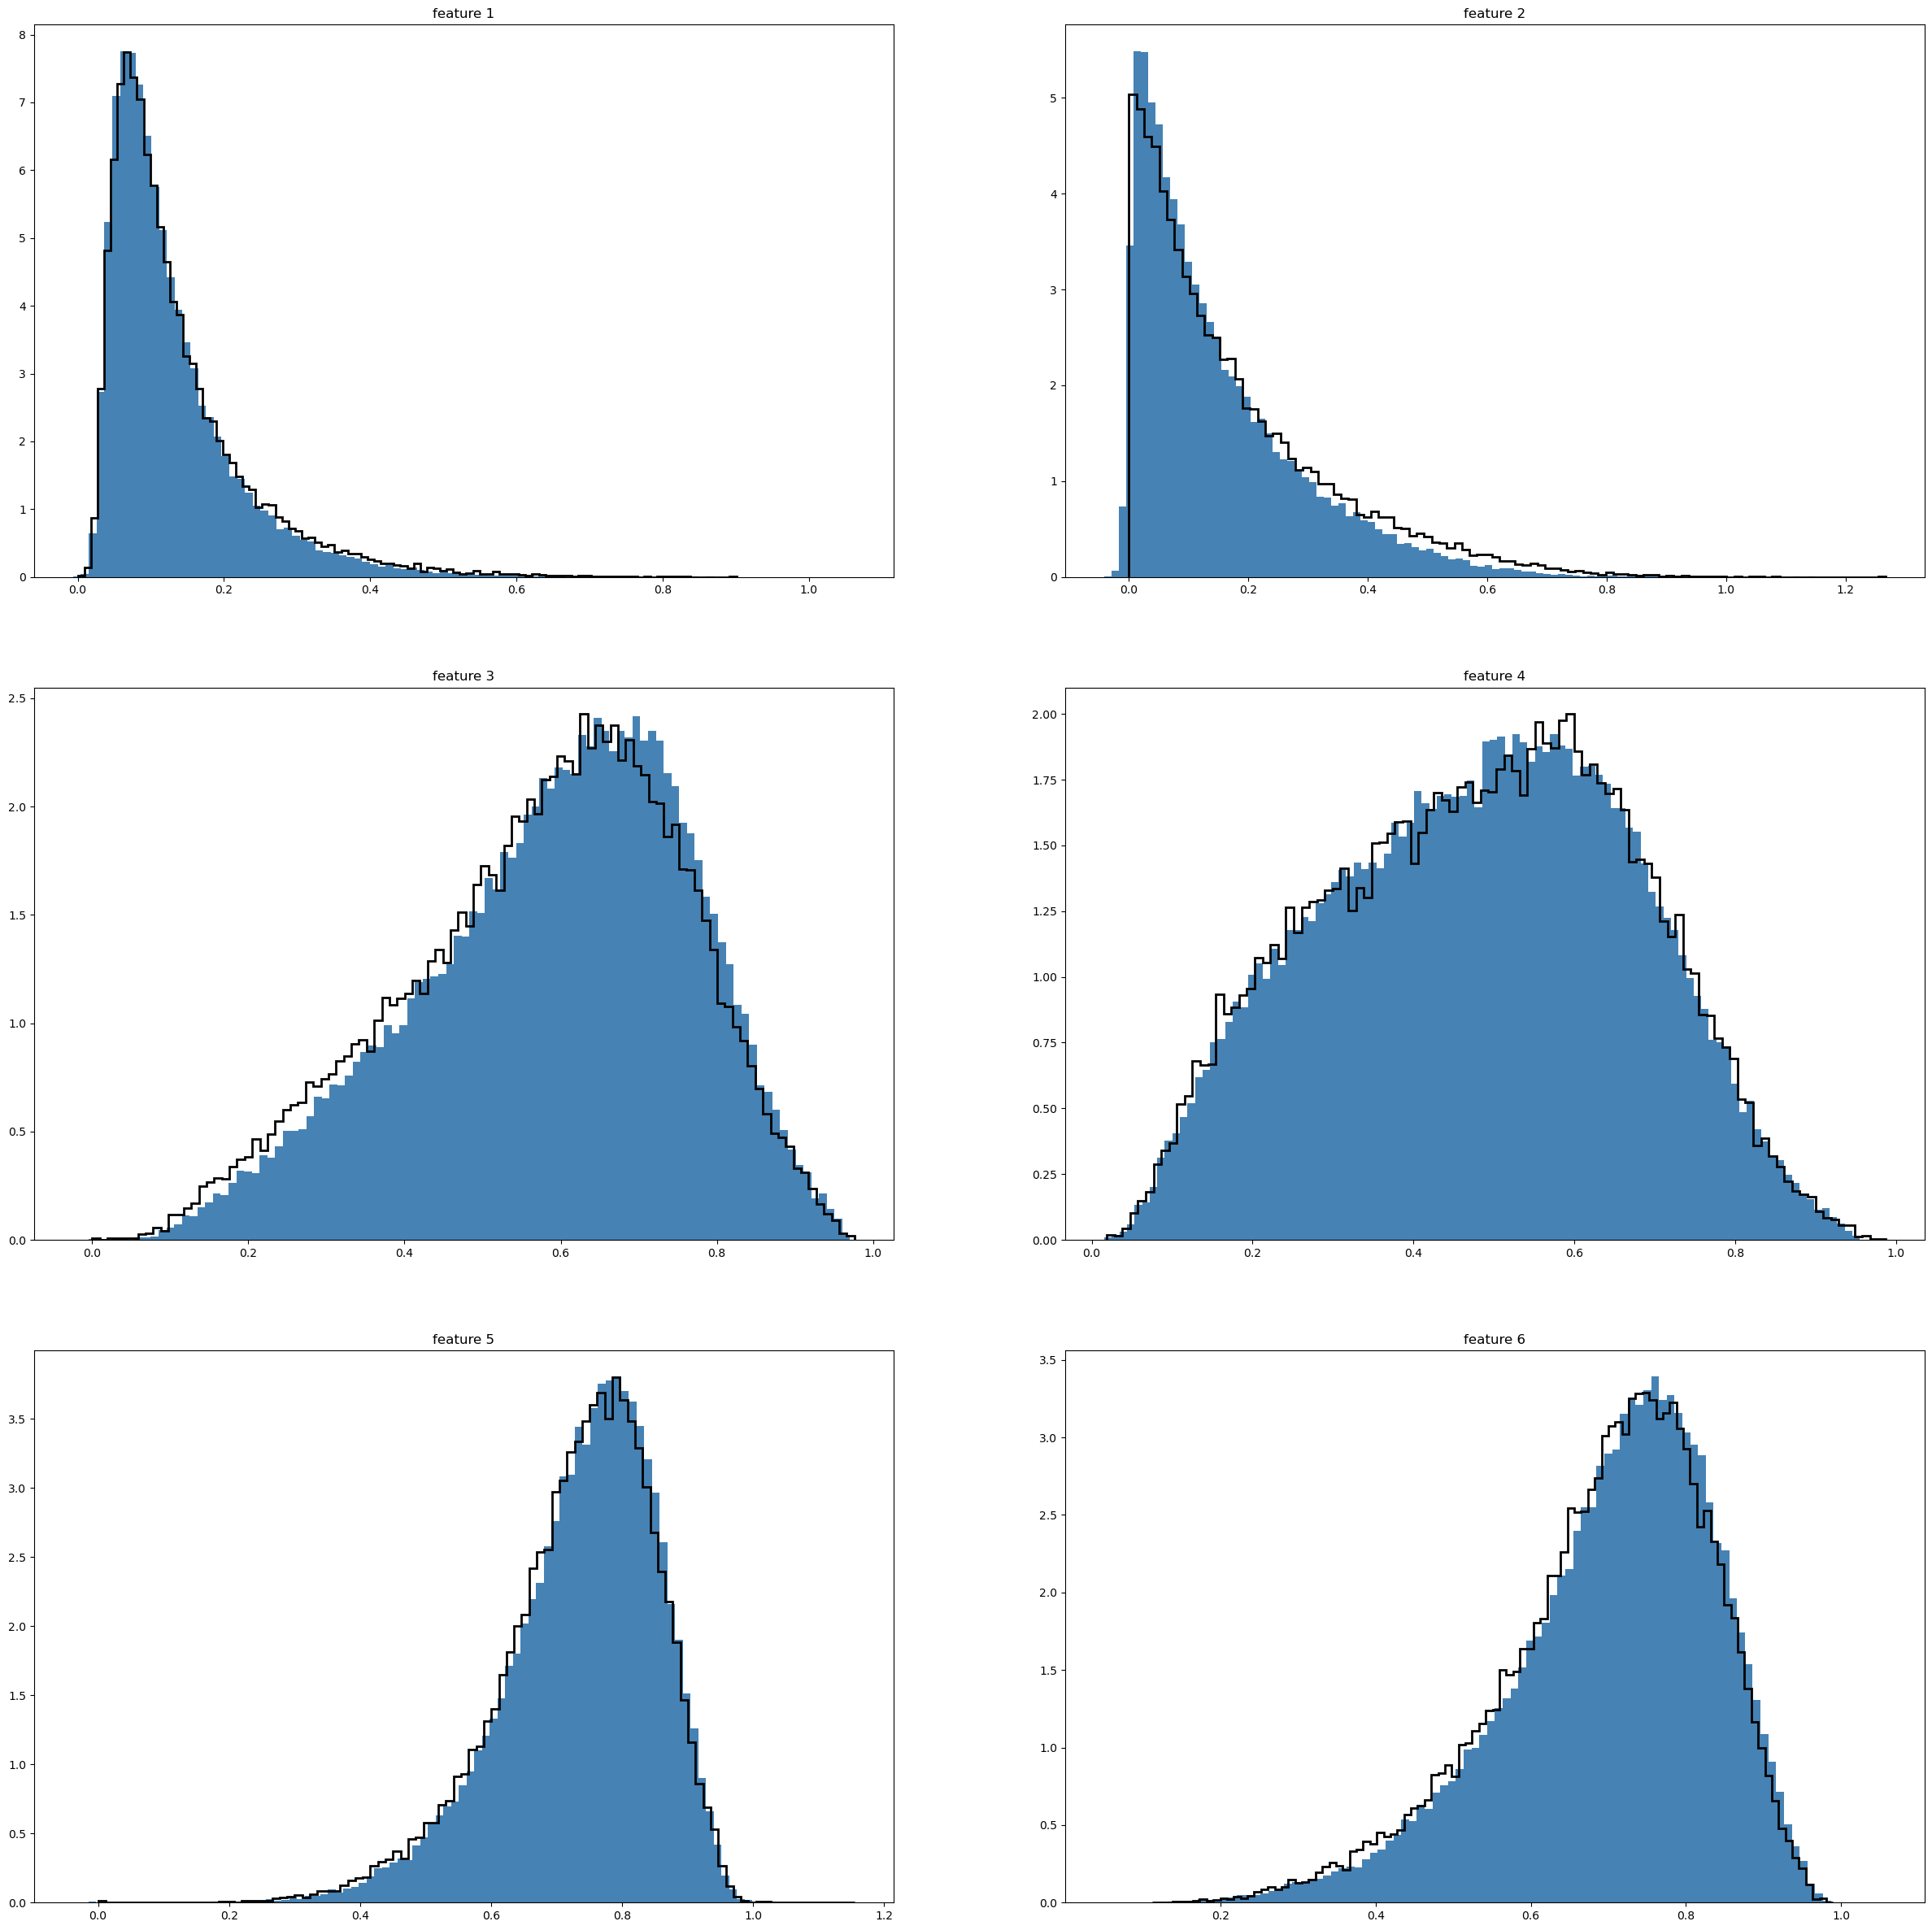

In [30]:
##plot higher sideband (3.7 to 4.1)

generated_sideband2 = generated_sideband[(mjj_generated_sideband>3.7) & (mjj_generated_sideband<4.1)]
monte_carlo_sideband2 = monte_carlo_sideband[(monte_carlo_sideband[:,0]>3.7) & (monte_carlo_sideband[:,0]<4.1),1:7]

fake_vs_real(generated_sideband2, monte_carlo_sideband2, 0, "test")

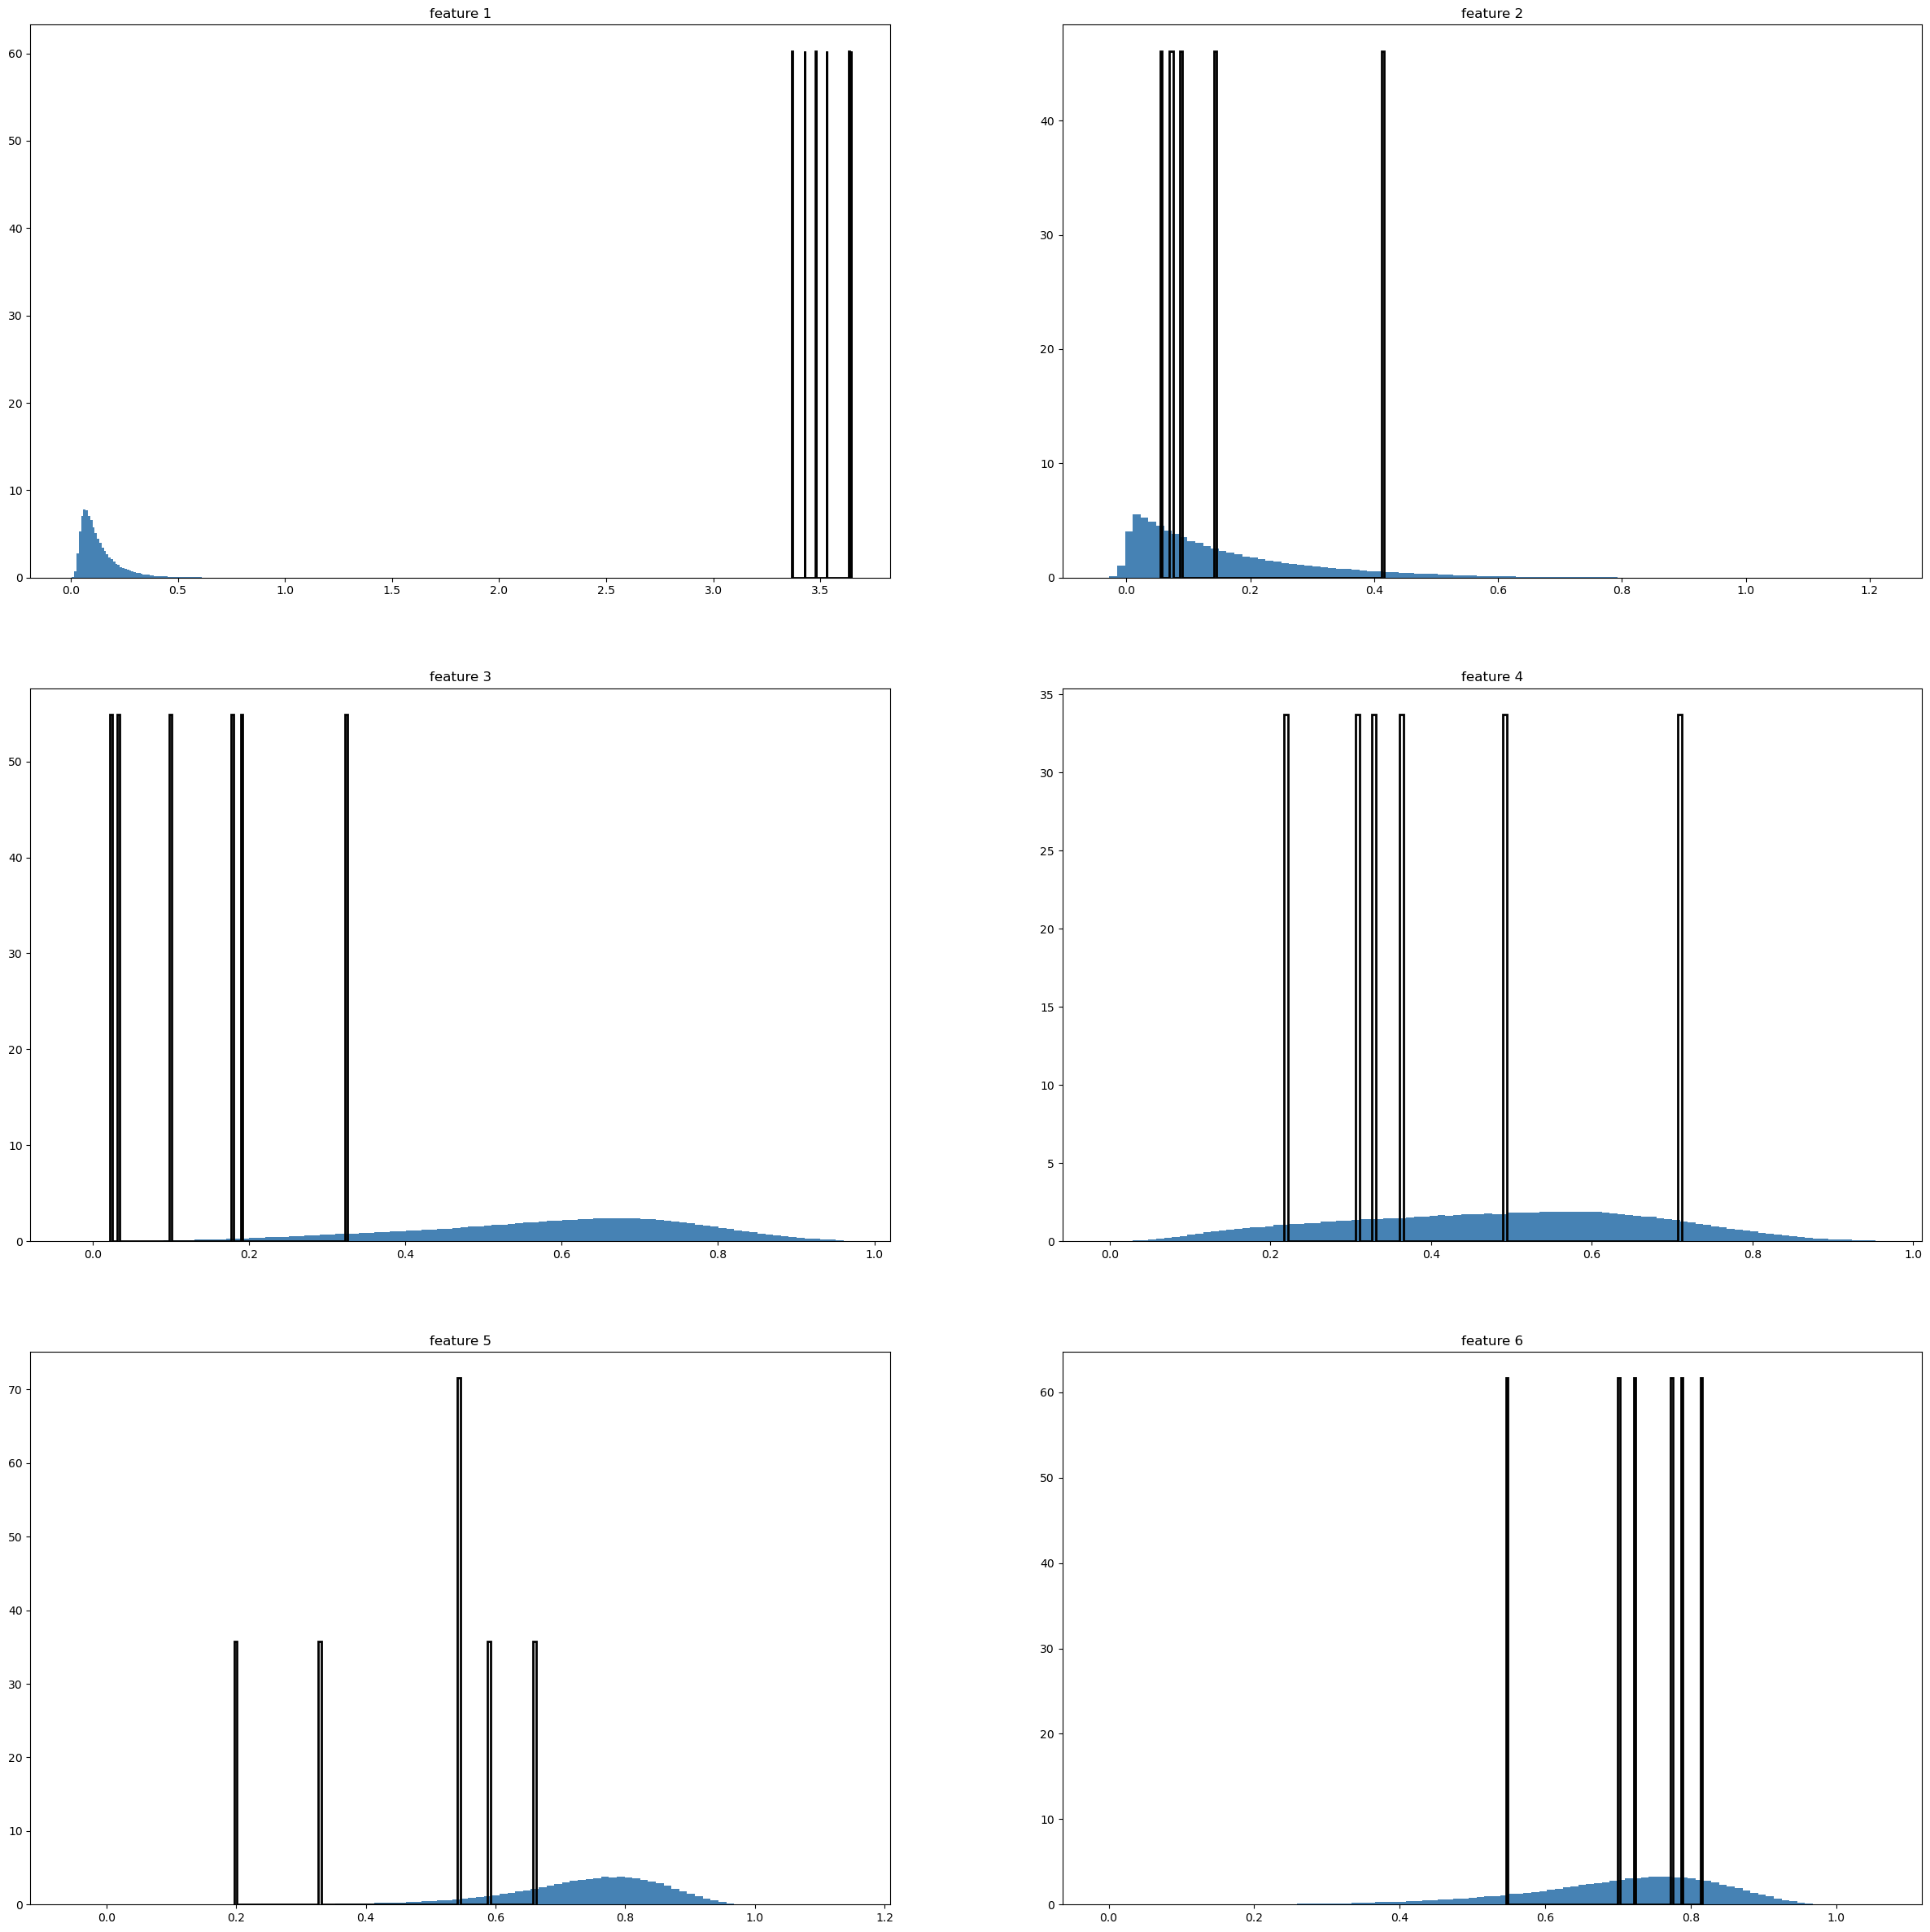

In [31]:
##plot signal

fake_vs_real(generated_signal,monte_carlo_signal[1:7], 0 ,"test")



In [24]:
print(monte_carlo_signal[:,1].max())
print(generated_signal[:,0].max())

0.7785609741210937
1.0609451532363892


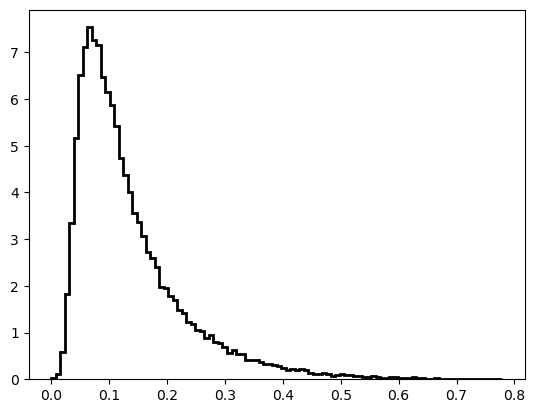

In [19]:
plt.hist(monte_carlo_signal[:,1], label = "real", color="black", linewidth=2, histtype = "step", density = True, bins=100)
plt.show()

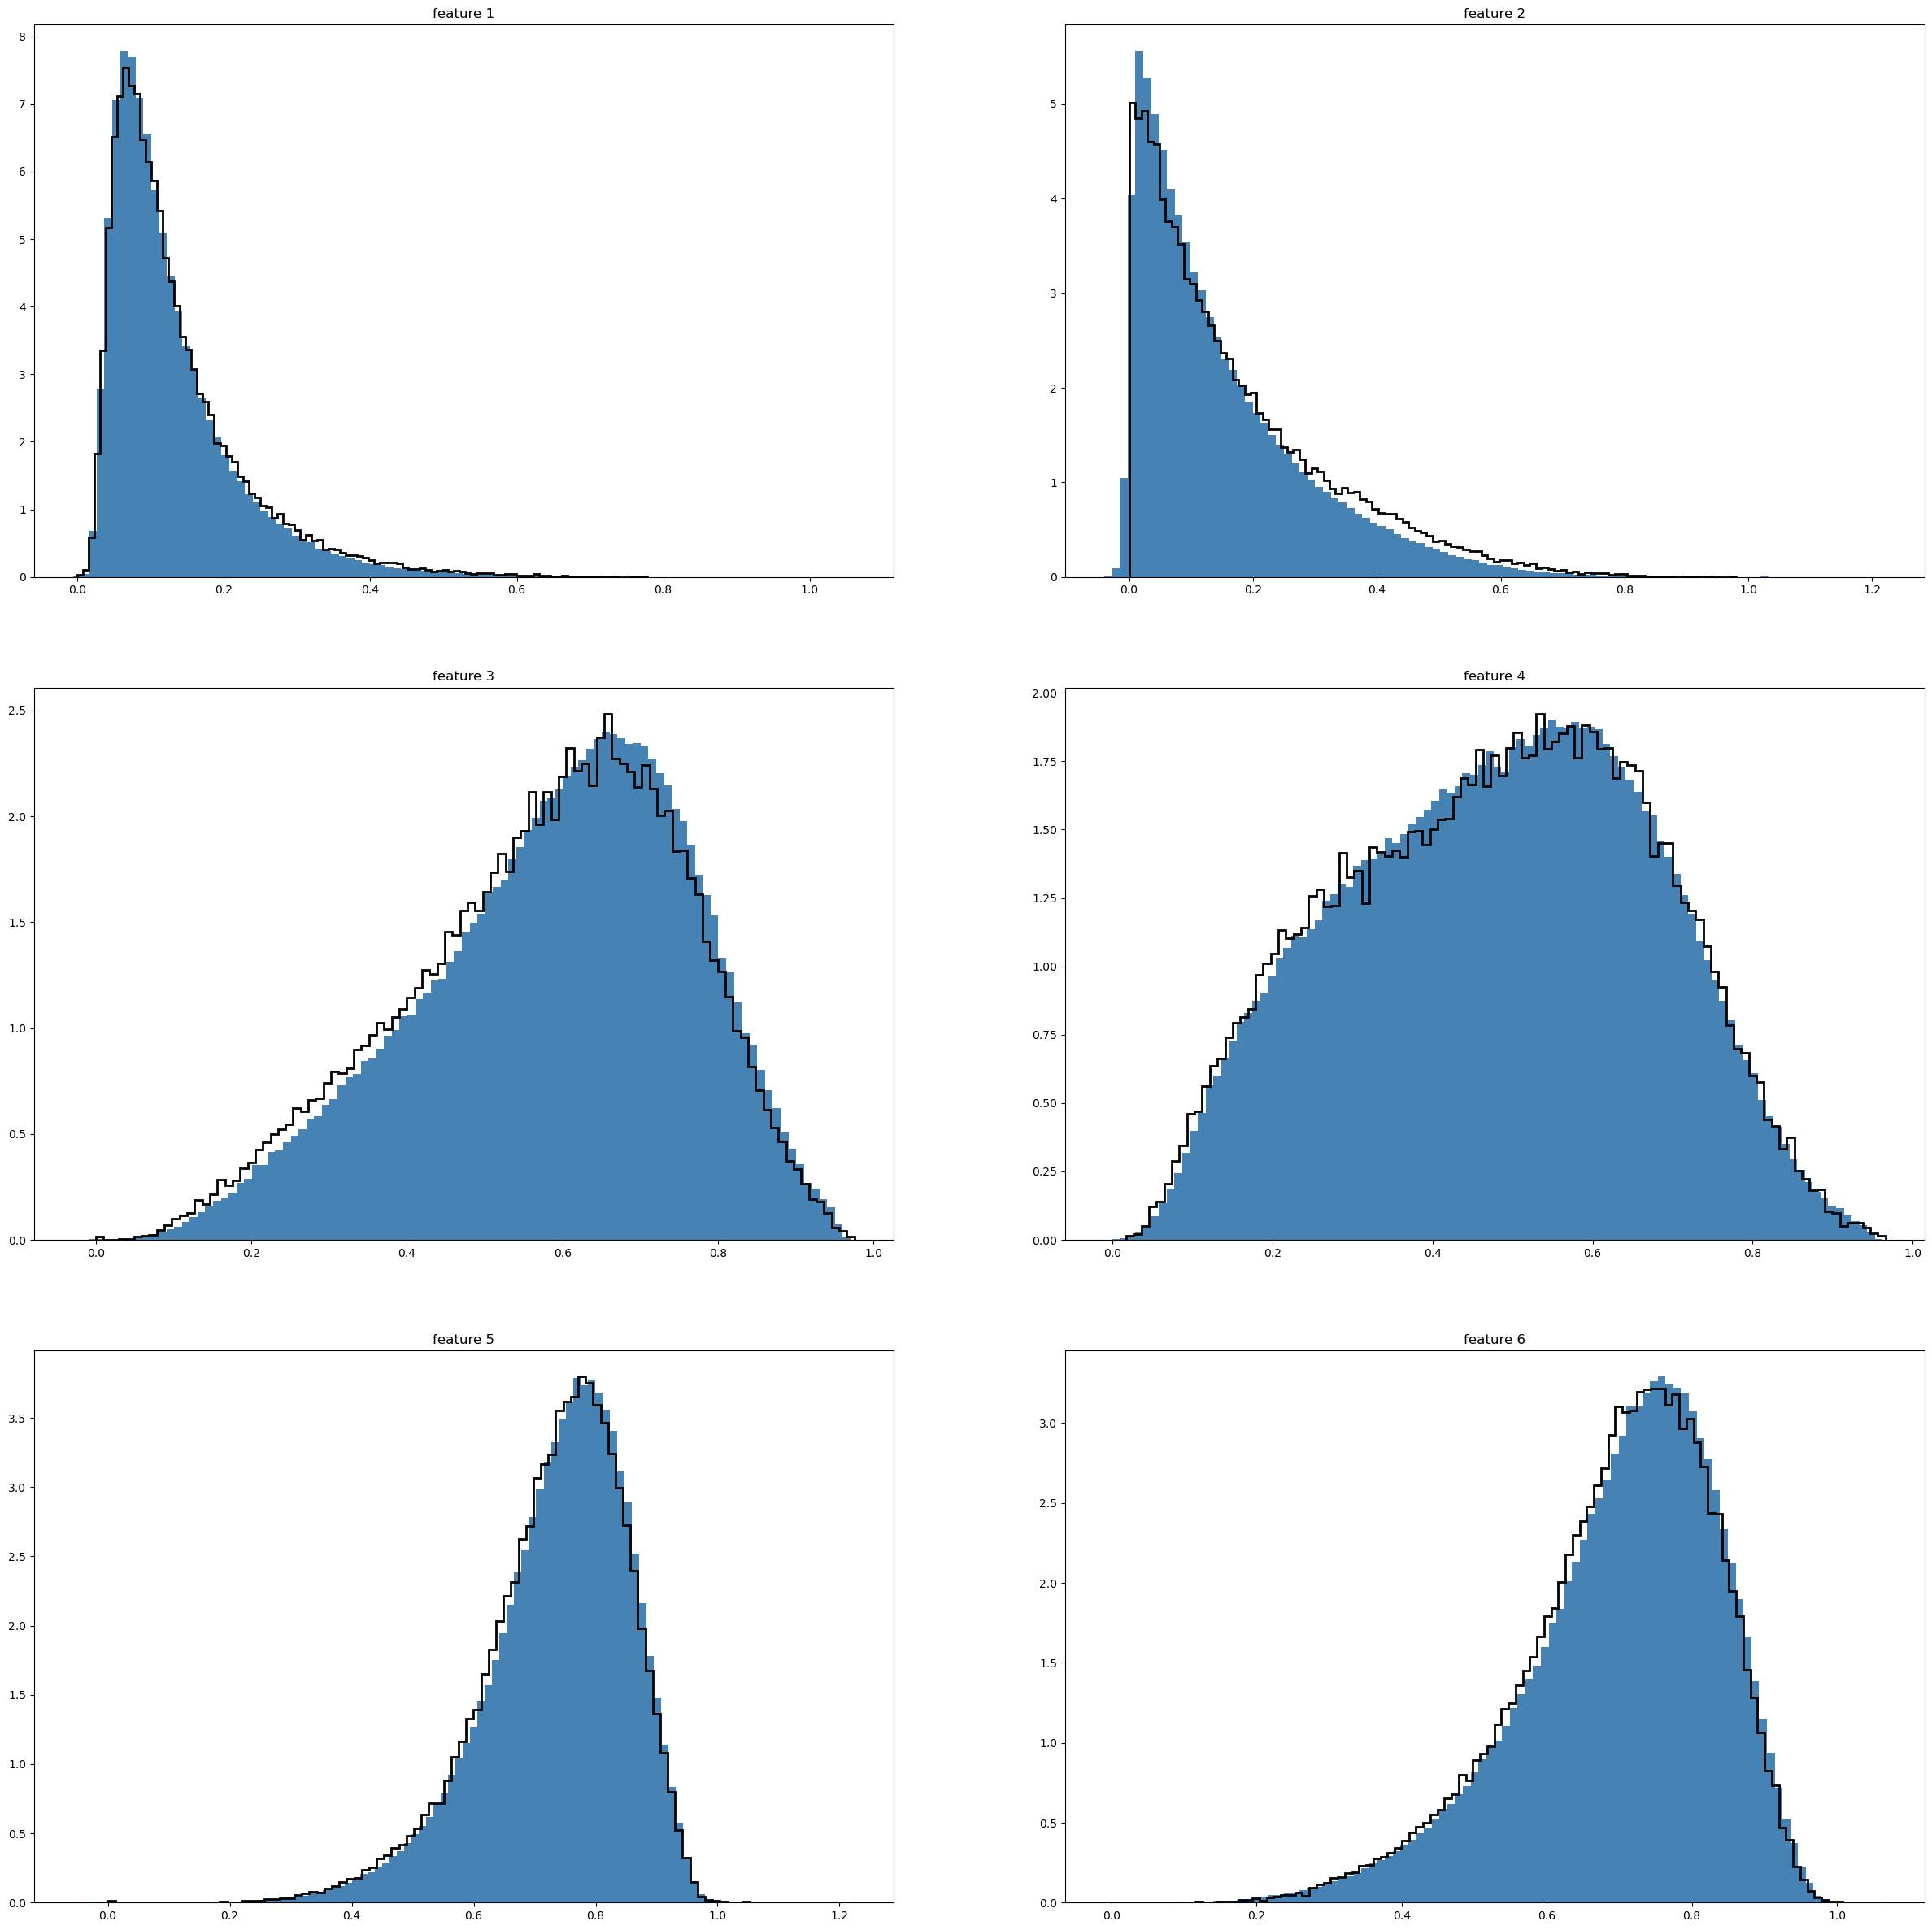

In [27]:


fig, axs = plt.subplots(3, 2, figsize=(30, 30))
for feature in range(6):

    axs[int(feature/2),feature%2].hist(monte_carlo_signal[:,feature+1], label = "real", color="black", linewidth=2, histtype = "step", density = True, bins=100)
    axs[int(feature/2),feature%2].hist(generated_signal[:,feature], label = "generated", color="steelblue", histtype="stepfilled", density = True, bins=100)
    axs[int(feature/2),feature%2].set_title("feature " + str(feature+1))


## Combined

In [ ]:
from attr_utils import AttributeDict
import json
import argparse
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
#loading signal

fileNameNN = 'data_save/LHCO2020_cb-VAE_events_6var_NoF_SR_2.csv'
generated_signal = pd.read_csv(fileNameNN, delimiter = ' ', header=None, index_col=False)
generated_signal = generated_signal.to_numpy()
monte_carlo_signal = np.load("Datasets/preprocessed_data_6var/innerdata_train_6var.npy")
mjj_generated_signal = np.load("data_save/mjj_SR_values.npy")


In [8]:
combined_signal = np.zeros((60000,7))
mjj_generated_signal = mjj_generated_signal.reshape(400000)
combined_signal[:,0] = mjj_generated_signal[0:60000]
combined_signal[:,1:7] = generated_signal[0:60000]
monte_carlo_sorted_signal = monte_carlo_signal[monte_carlo_signal[:, 0].argsort()]
generated_sorted_signal = combined_signal[combined_signal[:, 0].argsort()]


In [9]:
fileNameNN = 'data_save/LHCO2020_cb-VAE_events_6var_NoF_SB.csv'
generated_sideband = pd.read_csv(fileNameNN, delimiter = ' ', header=None, index_col=False)
generated_sideband = generated_sideband.to_numpy()
monte_carlo_sideband = np.load("Datasets/preprocessed_data_6var/outerdata_train_6var.npy")
test_values_sideband = np.load("Datasets/preprocessed_data_6var/outerdata_test_6var.npy")

monte_carlo_sideband = monte_carlo_sideband[monte_carlo_sideband[:, 7]==0]
test_values_sideband = test_values_sideband[test_values_sideband[:,7]==0]

mjj_generated_sideband = np.concatenate((monte_carlo_sideband[:,0], test_values_sideband[:,0]), axis=0)

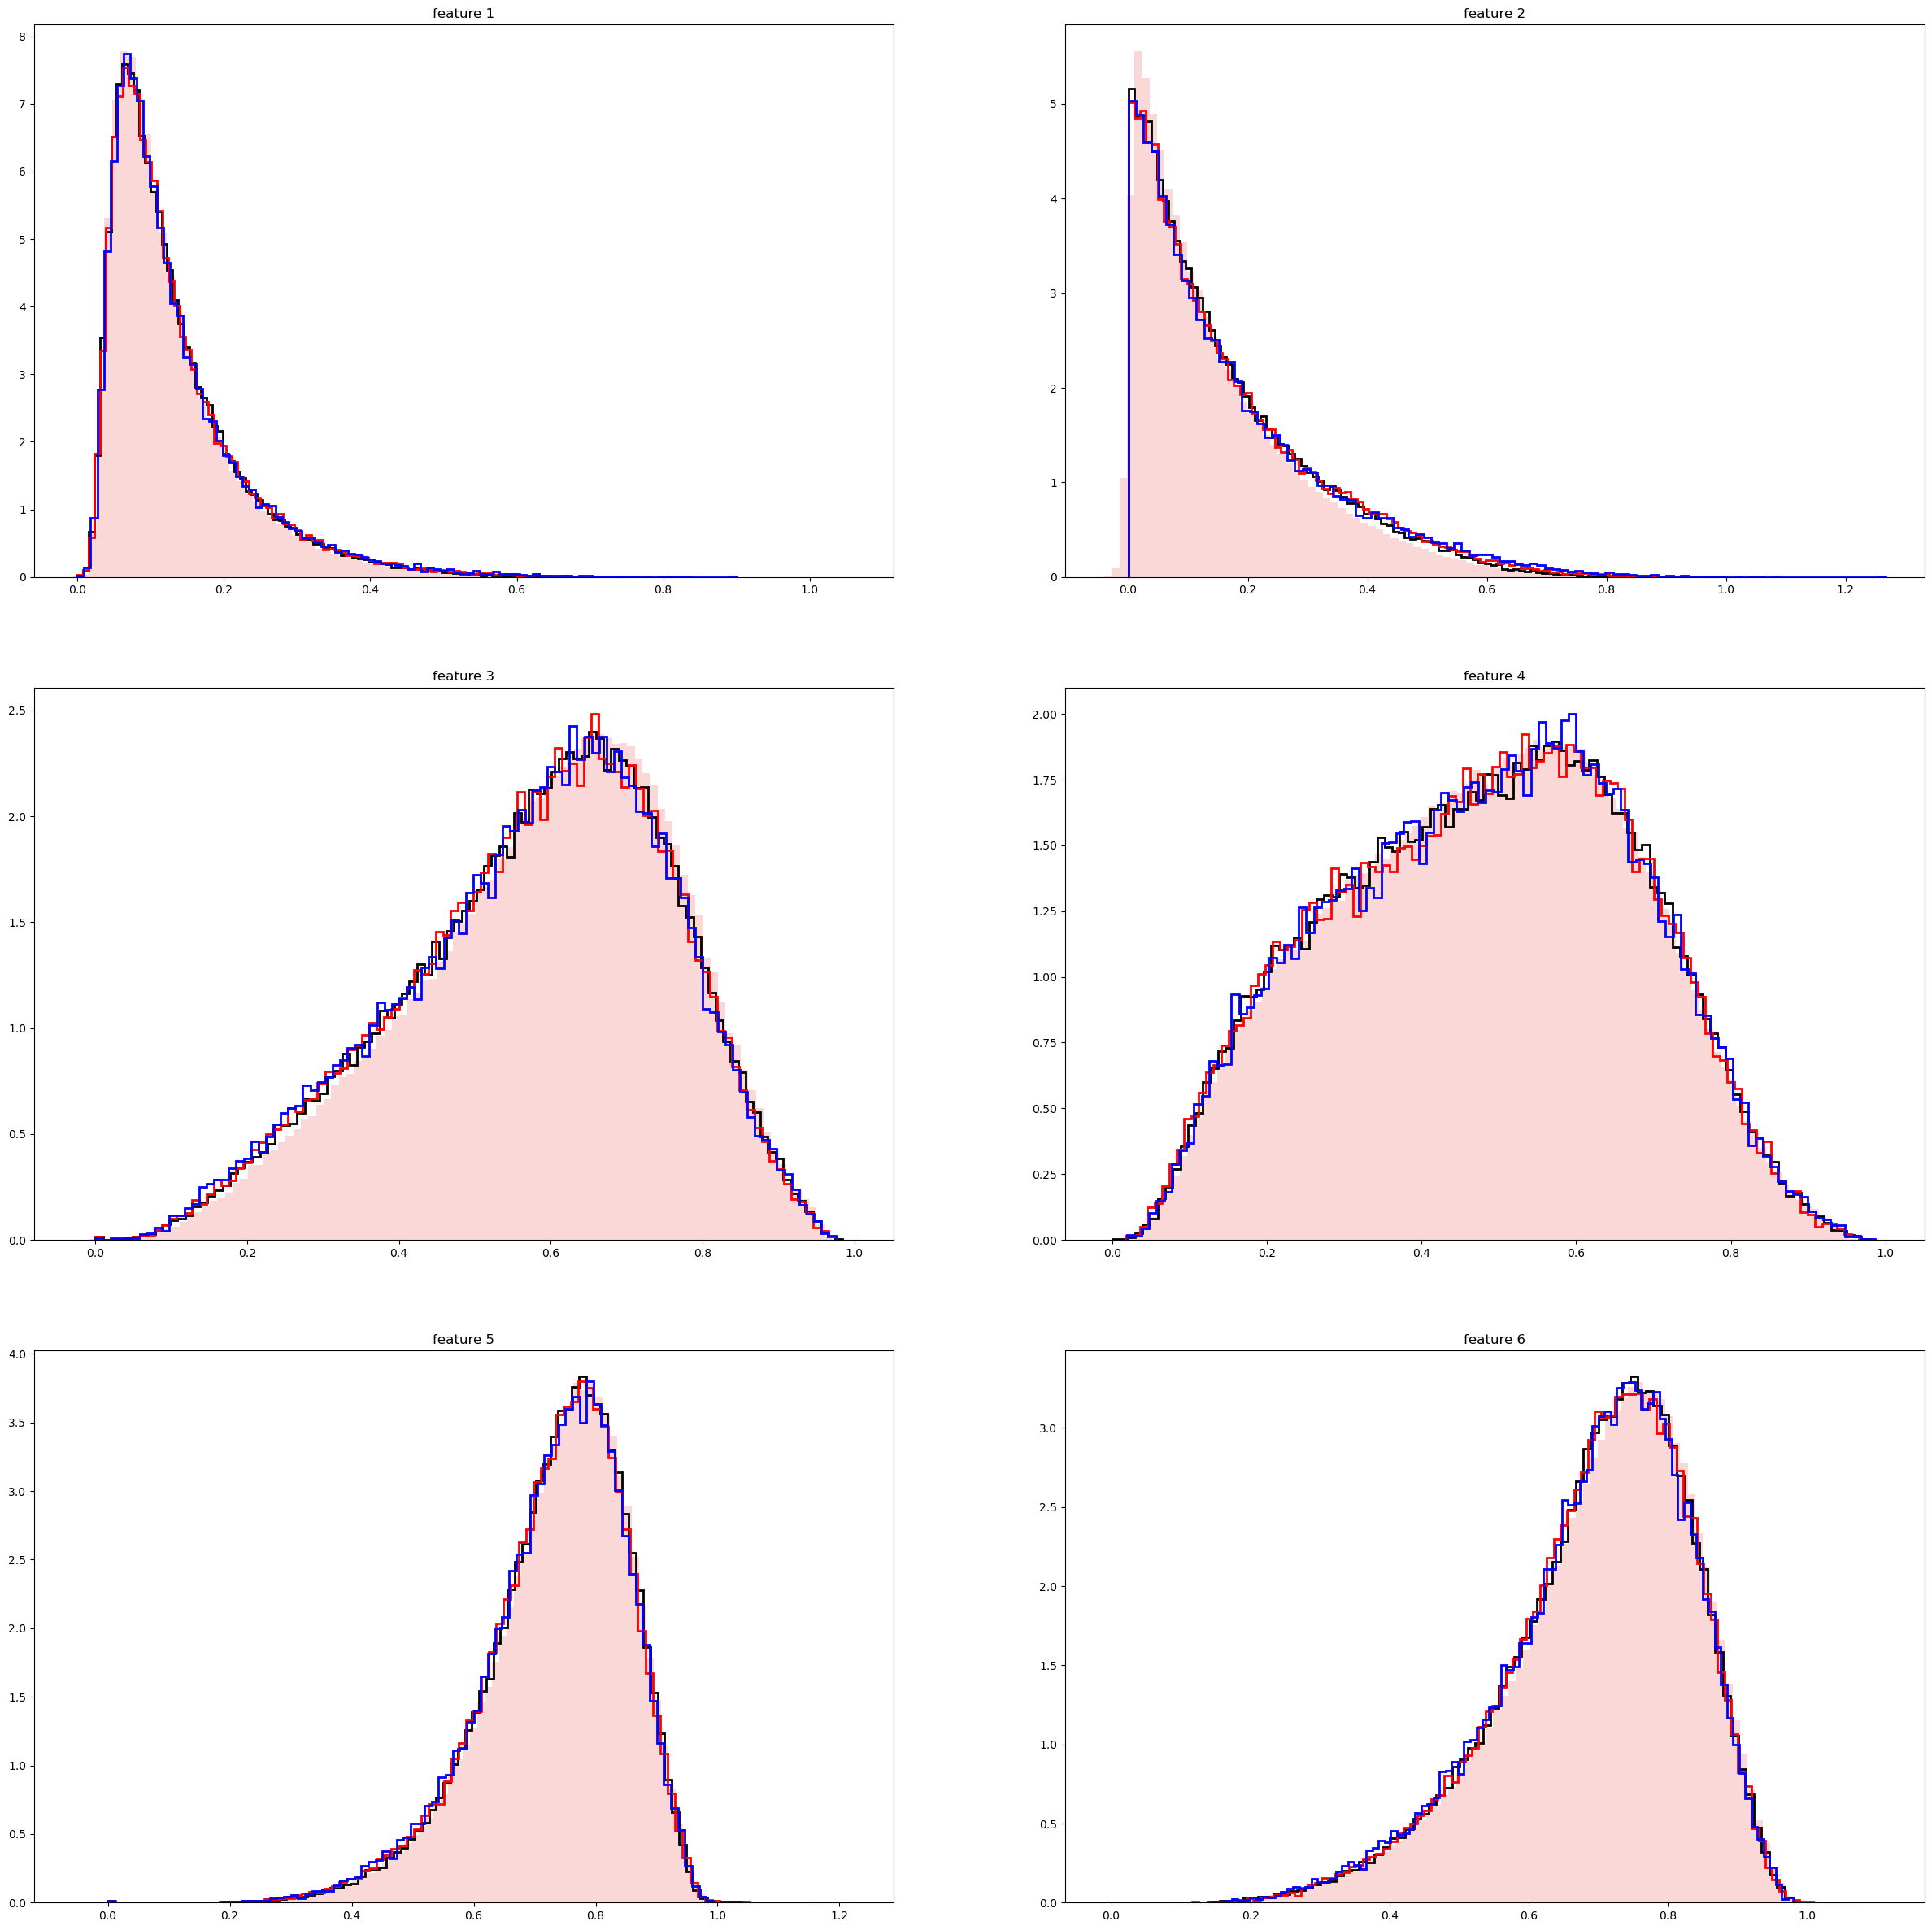

In [14]:
fig, axs = plt.subplots(3, 2, figsize=(30, 30))
for feature in range(6):

    #SB1
    axs[int(feature/2),feature%2].hist(generated_sideband[(generated_sideband[:,0]>2.9) & (generated_sideband[:,0]<3.3),feature], label = "generated", color="black", alpha=0.1, histtype="stepfilled", density = True, bins=100)
    axs[int(feature/2),feature%2].hist(monte_carlo_sideband[(monte_carlo_sideband[:,0]>2.9) & (monte_carlo_sideband[:,0]<3.3),feature+1], label = "real", color="black", linewidth=2, histtype = "step", density = True, bins=100)
    #signal
    axs[int(feature/2),feature%2].hist(generated_signal[:,feature], label = "generated", color="lightcoral", alpha=0.3, histtype="stepfilled", density = True, bins=100)
    axs[int(feature/2),feature%2].hist(monte_carlo_signal[:,feature+1], label = "real", color="red", linewidth=2, histtype = "step", density = True, bins=100)
    #SB2
    axs[int(feature/2),feature%2].hist(generated_sideband[(generated_sideband[:,0]>3.7) & (generated_sideband[:,0]<4.1),feature], label = "generated", color="steelblue", alpha=0.3, histtype="stepfilled", density = True, bins=100)
    axs[int(feature/2),feature%2].hist(monte_carlo_sideband[(monte_carlo_sideband[:,0]>3.7) & (monte_carlo_sideband[:,0]<4.1),feature+1], label = "real", color="blue", linewidth=2, histtype = "step", density = True, bins=100)
    
    
    
    axs[int(feature/2),feature%2].set_title("feature " + str(feature+1))